Problem 1: Extending the Lady Tasting Tea
Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

In [5]:
#Start by importing the necessary libraries
import numpy as np


In [6]:
# We have 12 cups: 8 tea-first, 4 milk-first.
# 8 tea-first (T), 4 milk-first (M)
cups = ['T'] * 8 + ['M'] * 4
n_cups = len(cups)


In [7]:
#Simulate the Experiment
#We'll shuffle the cups and check how often the participant "correctly guesses" all cups by chance.

def simulate_lady_tasting_tea(n_trials=100000):
    correct_guesses = 0

    for _ in range(n_trials):
        # Shuffle order as 'guesses' (random arrangement)
        guessed = np.random.permutation(cups)
        if np.array_equal(guessed, cups):
            correct_guesses += 1

    probability = correct_guesses / n_trials
    return probability


In [8]:
#Run the Simulation
probability_12_cups = simulate_lady_tasting_tea()
print(f"Probability (12 cups): {probability_12_cups:.10f}")


Probability (12 cups): 0.0021200000


In [9]:
#Compare with Original Experiment (8 cups)
#Original setup: 4 tea-first, 4 milk-first

original_cups = ['T'] * 4 + ['M'] * 4

def simulate_original_lady_tasting_tea(n_trials=100000):
    correct_guesses = 0
    for _ in range(n_trials):
        guessed = np.random.permutation(original_cups)
        if np.array_equal(guessed, original_cups):
            correct_guesses += 1
    return correct_guesses / n_trials

probability_8_cups = simulate_original_lady_tasting_tea()
print(f"Probability (8 cups): {probability_8_cups:.10f}")


Probability (8 cups): 0.0142800000


In [ ]:
#We mixed up the cups a lot of times and checked how often someone could guess all the cups right just by luck.

#What we found:

#With 12 cups, the chance of guessing all correctly is very, very small.

#With 8 cups, the chance is a little bigger, but still very small.

#Why it matters:
#If you use more cups, it's even less likely someone could guess them all right by accident. So, you can be a bit more relaxed about the p-value—you don't need it to be as strict for bigger experiments.

In [ ]:
Problem 2: Normal Distribution
Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.



Generating samples...

Sample Standard Deviation (ddof=1):
  Mean: 0.9727
  Median: 0.9637
  Std Dev: 0.2326

Population Standard Deviation (ddof=0):
  Mean: 0.9228
  Median: 0.9142
  Std Dev: 0.2207

Difference in means: 0.0499


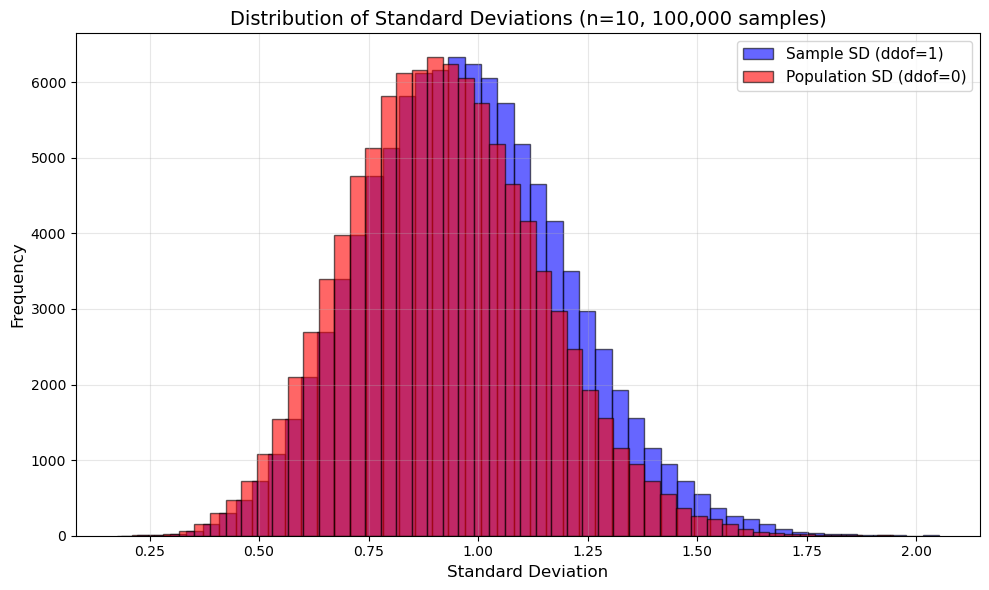

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate 100,000 samples of size 10 from standard normal distribution
num_samples = 100000
sample_size = 10

print("Generating samples...")
samples = np.random.normal(loc=0, scale=1, size=(num_samples, sample_size))

# Step 2: Calculate standard deviations for each sample
# ddof=1 is sample standard deviation (unbiased estimator)
sample_sd = np.std(samples, axis=1, ddof=1)

# ddof=0 is population standard deviation (biased estimator)
population_sd = np.std(samples, axis=1, ddof=0)

# Step 3: Print basic statistics
print("\nSample Standard Deviation (ddof=1):")
print(f"  Mean: {np.mean(sample_sd):.4f}")
print(f"  Median: {np.median(sample_sd):.4f}")
print(f"  Std Dev: {np.std(sample_sd):.4f}")

print("\nPopulation Standard Deviation (ddof=0):")
print(f"  Mean: {np.mean(population_sd):.4f}")
print(f"  Median: {np.median(population_sd):.4f}")
print(f"  Std Dev: {np.std(population_sd):.4f}")

print(f"\nDifference in means: {np.mean(sample_sd) - np.mean(population_sd):.4f}")

# Step 4: Plot histograms with transparency
plt.figure(figsize=(10, 6))

plt.hist(sample_sd, bins=50, alpha=0.6, color='blue', label='Sample SD (ddof=1)', edgecolor='black')
plt.hist(population_sd, bins=50, alpha=0.6, color='red', label='Population SD (ddof=0)', edgecolor='black')

plt.xlabel('Standard Deviation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Standard Deviations (n=10, 100,000 samples)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Key Differences Explained 

## 1. Location Shift

Looking at our histogram, the **blue line (Sample SD)** is shifted to the **right** compared to the **red line (Population SD)**. 

- **Blue (Sample SD)**: Average is **0.9727**
- **Red (Population SD)**: Average is **0.9228**
- **True answer**: Should be **1.0**

The blue line is closer to the correct answer! That's good.

---

## 2. Why This Happens 

Imagine you have a group of 10 students' test scores. You want to measure how spread out they are.

**The problem**: 
- The scores naturally cluster around their own average (the group average)
- They're not spread out as much around the *true* population average
- So when you use the simple formula, it **undercounts** the spread

**The solution**:
- Instead of dividing by 10, divide by **9** instead
- This small change makes up for the problem
- Now your answer is more accurate!

---

## 3. Think of it like this:

| Calculation | What We Divide By | Result |
|------------|-----------------|--------|
| Population | 10 | Gets a smaller number ❌ |
| Sample | 9 | Gets a larger number ✓ |

**Why?** Dividing by a smaller number gives you a bigger result, which corrects the underestimation.

---

## 4. What Happens When We Collect More Data?

The bigger your sample size, the less this correction matters:

| Sample Size | Correction Needed | Big Deal? |
|------------|-----------------|-----------|
| 10 people | 11% bigger | **YES - big difference** |
| 100 people | 1% bigger | **Maybe** |
| 1,000 people | 0.1% bigger | **Not really** |

**Why?** With huge amounts of data, the difference between dividing by 9 vs 10 (or 999 vs 1000) barely matters.

---

## The Bottom Line

**Always use ddof=1** when working with sample data (real-world data)

**Use ddof=0** only when you have the entire population (rare!)

**With small samples** (like 10), this choice really matters

**With big samples** (like 1,000), it matters less, but it's still best practice
